In [2]:
import requests
import pandas as pd
import json

!pip install xmltodict
import xmltodict

In [80]:
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson'
key='oKHafytWWagZ4BQHtGg59Xmc1zd2/6cW41ej/tTXt9fu42lcz+nWz4yyqDU5jomJW2HvnfCWLJFT4htRtzDWFg=='
params ={'serviceKey' : key, 'pageNo' : 1, 'numOfRows' : 100, 'startCreateDt' : '20220320', 'endCreateDt' : '20220325' }

response = requests.get(url, params=params)
results = response.text
results

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><createDt>2022-03-25 09:00:20.4</createDt><deathCnt>14294</deathCnt><decideCnt>11162131</decideCnt><seq>828</seq><stateDt>20220325</stateDt><stateTime>00:00</stateTime><updateDt>2022-03-26 08:55:26.339</updateDt></item><item><createDt>2022-03-24 09:03:23.4</createDt><deathCnt>13901</deathCnt><decideCnt>10822718</decideCnt><seq>827</seq><stateDt>20220324</stateDt><stateTime>00:00</stateTime><updateDt>2022-03-25 10:09:24.675</updateDt></item><item><createDt>2022-03-23 09:18:19.212</createDt><deathCnt>13432</deathCnt><decideCnt>10427121</decideCnt><seq>826</seq><stateDt>20220323</stateDt><stateTime>00:00</stateTime><updateDt>2022-03-25 09:05:29.945</updateDt></item><item><createDt>2022-03-22 08:56:35.519</createDt><deathCnt>13141</deathCnt><decideCnt>9936277</decideCnt><seq>825</seq><stateDt>20220322</stateDt><stateTime>00:0

In [10]:
results_to_json = xmltodict.parse(results) # xml -> dic
json_dump = json.dumps(results_to_json)
data = json.loads(json_dump)

data

{'response': {'body': {'items': {'item': [{'createDt': '2022-03-25 09:00:20.4',
      'deathCnt': '14294',
      'decideCnt': '11162131',
      'seq': '828',
      'stateDt': '20220325',
      'stateTime': '00:00',
      'updateDt': '2022-03-26 08:55:26.339'},
     {'createDt': '2022-03-24 09:03:23.4',
      'deathCnt': '13901',
      'decideCnt': '10822718',
      'seq': '827',
      'stateDt': '20220324',
      'stateTime': '00:00',
      'updateDt': '2022-03-25 10:09:24.675'},
     {'createDt': '2022-03-23 09:18:19.212',
      'deathCnt': '13432',
      'decideCnt': '10427121',
      'seq': '826',
      'stateDt': '20220323',
      'stateTime': '00:00',
      'updateDt': '2022-03-25 09:05:29.945'},
     {'createDt': '2022-03-22 08:56:35.519',
      'deathCnt': '13141',
      'decideCnt': '9936277',
      'seq': '825',
      'stateDt': '20220322',
      'stateTime': '00:00',
      'updateDt': '2022-03-25 09:06:36.22'},
     {'createDt': '2022-03-21 09:10:38.912',
      'deathCnt': '1

In [16]:
corona = data['response']['body']['items']['item']
corona

[{'createDt': '2022-03-25 09:00:20.4',
  'deathCnt': '14294',
  'decideCnt': '11162131',
  'seq': '828',
  'stateDt': '20220325',
  'stateTime': '00:00',
  'updateDt': '2022-03-26 08:55:26.339'},
 {'createDt': '2022-03-24 09:03:23.4',
  'deathCnt': '13901',
  'decideCnt': '10822718',
  'seq': '827',
  'stateDt': '20220324',
  'stateTime': '00:00',
  'updateDt': '2022-03-25 10:09:24.675'},
 {'createDt': '2022-03-23 09:18:19.212',
  'deathCnt': '13432',
  'decideCnt': '10427121',
  'seq': '826',
  'stateDt': '20220323',
  'stateTime': '00:00',
  'updateDt': '2022-03-25 09:05:29.945'},
 {'createDt': '2022-03-22 08:56:35.519',
  'deathCnt': '13141',
  'decideCnt': '9936277',
  'seq': '825',
  'stateDt': '20220322',
  'stateTime': '00:00',
  'updateDt': '2022-03-25 09:06:36.22'},
 {'createDt': '2022-03-21 09:10:38.912',
  'deathCnt': '12757',
  'decideCnt': '9582314',
  'seq': '824',
  'stateDt': '20220321',
  'stateTime': '00:00',
  'updateDt': '2022-03-25 09:07:01.306'},
 {'createDt': '20

In [20]:
corona[0]['stateDt'], corona[0]['decideCnt'], corona[0]['deathCnt']

('20220325', '11162131', '14294')

In [67]:
sDate = []
cCnt = []
dCnt = []

for n in range(-1, -len(corona) - 1, -1):
  sDate.append(corona[n]['stateDt'])
  cCnt.append(corona[n]['decideCnt'])
  dCnt.append(corona[n]['deathCnt'])

coronaData = {"기준일" : sDate, "확진자수" : cCnt, "사망자수" : dCnt}
coronaDf = pd.DataFrame(coronaData)
coronaDf

,기준일,확진자수,사망자수
0,20220320,9373175,12428
1,20220321,9582314,12757
2,20220322,9936277,13141
3,20220323,10427121,13432
4,20220324,10822718,13901
5,20220325,11162131,14294


In [42]:
coronaDf.to_excel("corona.xlsx", sheet_name='corona')

In [75]:
coronaDf

,기준일,확진자수,사망자수
0,2022-03-20,9373175,12428
1,2022-03-21,9582314,12757
2,2022-03-22,9936277,13141
3,2022-03-23,10427121,13432
4,2022-03-24,10822718,13901
5,2022-03-25,11162131,14294


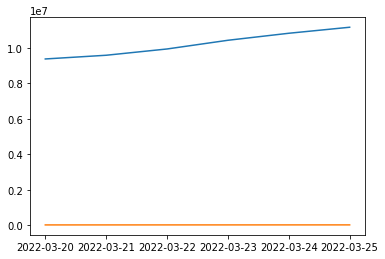

In [77]:
import matplotlib.pyplot as plt

coronaDf['기준일'] = pd.to_datetime(coronaDf['기준일'])
#coronaDf['확진자수'] = pd.to_numeric(coronaDf['확진자수'])
#coronaDf['사망자수'] = pd.to_numeric(coronaDf['사망자수'])
coronaDf['확진자수'] = coronaDf['확진자수'].astype('int')
coronaDf['사망자수'] = coronaDf['사망자수'].astype('int')

x = coronaDf['기준일']
y = coronaDf['확진자수']
y2 = coronaDf['사망자수']

plt.plot(x, y)
plt.plot(x, y2)

In [74]:
coronaDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일     6 non-null      datetime64[ns]
 1   확진자수    6 non-null      int64         
 2   사망자수    6 non-null      int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 272.0 bytes
